In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import Column, Integer, String, Float

In [5]:
#Feed Csv Data into DF
stations="/Users/algend/Homework-10/Resources/hawaii_stations.csv"
weather="/Users/algend/Homework-10/Resources/hawaii_measurements.csv"
stations_dt =pd.read_csv(stations, encoding="iso-8859-1")
weather_dt =pd.read_csv(stations, encoding="iso-8859-1")
stations_df=pd.DataFrame(stations_dt)
weather_df=pd.DataFrame(weather_dt)

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data=session.query(Measurement.date, Measurement.prcp).all()
precip_data_df=pd.DataFrame(precip_data)
#Drop NaN
precip_data_df.dropna()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
5,2010-01-07,0.06
6,2010-01-08,0.00
7,2010-01-09,0.00
8,2010-01-10,0.00
9,2010-01-11,0.01
10,2010-01-12,0.00


In [12]:
# Calculate the date 1 year ago from the last data point in the database
date_year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
date_year_ago

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
precip_year=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=date_year_ago).all()
precip_year_df=pd.DataFrame(precip_year)
precip_year_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(precip_year, columns=['date', 'precipitation'])
precip_df['date']=pd.to_datetime(precip_df['date'], format='%Y-%m-%d')
precip_df.set_index('date', inplace=True)



In [15]:
# Sort the dataframe by date
precip_df=precip_df.sort_values(by='date',ascending=False)

precip_df.head()

,precipitation
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00


In [16]:
#Drop Nan replace with null in precipitation
precip_df.dropna()

,precipitation
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-22,0.00
2017-08-21,0.56
2017-08-21,0.02


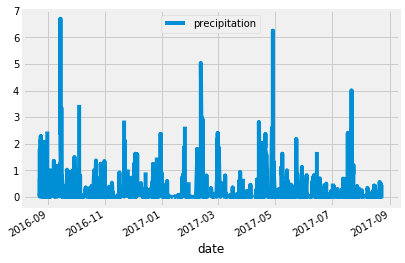

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.legend(loc='upper center')
fig.tight_layout()
plt.savefig("Images/Precipitation.png")

plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?
count_stations=session.query(Measurement.station).distinct().count()
print(f"Stations Total Count: {count_stations}")

Stations Total Count: 9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station,
func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(f"Most active station is "+active_stations[0][0]+" with "+str(active_stations[0][1])+" observations")


Most active station is USC00519281 with 2772 observations


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = [Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_temp_var=session.query(*temp).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).first()
station_temp_var

('USC00519281', 54.0, 85.0, 71.66378066378067)

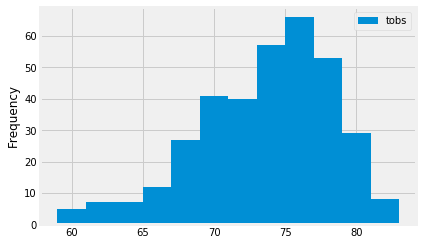

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_1=station_temp_var[0]
annual_temp=session.query(Measurement.date, Measurement.tobs). \
filter(Measurement.station==station_1). \
filter(Measurement.date>=date_year_ago). \
order_by(Measurement.date).all()
df_annual_temp=pd.DataFrame(annual_temp,columns=['date','tobs'])
#Plot
df_annual_temp.plot.hist(bins=12)
plt.savefig("Images/Temp_Observation.png")
fig.tight_layout()
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip =calc_temps('2017-01-01', '2018-01-01')
start_date = dt.date(2017, 1, 1)
end_date = dt.date(2018, 1, 1)
previous_year = dt.timedelta(days=365)
avg_previous_year = (calc_temps((start_date-end_date), (end_date-previous_year)))
avg_previous_year

[(53.0, 73.01624538796189, 87.0)]

In [25]:
#Standard Error 
error= avg_previous_year[0][1]-avg_previous_year[0][0]
x = 0
y = [avg_previous_year[0][2]]


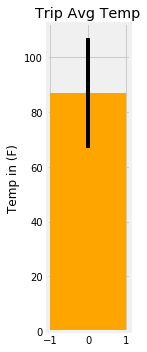

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(2,5))
ax.set_title("Trip Avg Temp")
ax.set_ylabel("Temp in (F)")
ax.bar(x,y, color="orange", width =2, yerr=error)
fig.tight_layout()
plt.savefig("Images/Precipitation.png")

#plt.show()




In [27]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_per_station = session.query(Measurement.station, Station.name, Station.latitude,
                                    Station.longitude, Station.elevation, Measurement.prcp).\
filter(Measurement.station == Station.station).\
filter(Measurement.date >=start_date).\
filter(Measurement.date <= end_date).\
group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

rainfall_df = pd.DataFrame(rainfall_per_station)
rainfall_df


,station,name,latitude,longitude,elevation,prcp
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.29
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.03
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.03
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.00
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,NaN


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    """Calculation for the daily Normals."""
    data= [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*data).filter(func.strftime("%m-%d", Measurement.date)==date).all()
daily_normals("05-01")

[(65.0, 72.75925925925925, 79.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]

# Set the start and end date of the trip
start_date = "05-18"
end_date = "05-31"

# Use the start and end date to create a range of dates
date_range = [f"05-{date}" for date in range(18,31)]
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in date_range:
    normal=daily_normals(date)
    normals.extend(normal)

In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
t_min = [x[0] for x in normals]
t_avg = [x[1] for x in normals]
t_max = [x[2] for x in normals]
year=[f"2018-{date}" for date in date_range]
trip_daily_normals= pd.DataFrame({"Trip Min":t_min,"Trip avg":t_avg, "Trip Max":t_max,"Date": year}, 
                                 index=date_range)
trip_daily_normals

,Trip Min,Trip avg,Trip Max,Date
05-18,68.0,74.107143,82.0,2018-05-18
05-19,65.0,73.807018,79.0,2018-05-19
05-20,68.0,73.896552,79.0,2018-05-20
05-21,64.0,72.964286,80.0,2018-05-21
05-22,64.0,74.456140,80.0,2018-05-22
05-23,68.0,74.948276,87.0,2018-05-23
05-24,67.0,73.948276,79.0,2018-05-24
05-25,68.0,74.275862,79.0,2018-05-25
05-26,65.0,74.036364,82.0,2018-05-26
05-27,65.0,74.490909,80.0,2018-05-27


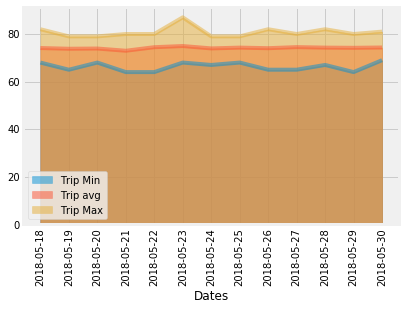

In [36]:
# Plot the daily normals as an area plot with `stacked=False`
trip_daily_normals.plot(kind="area", stacked=False)
plt.xlabel("Dates")
plt.xticks(range(len(trip_daily_normals["Date"])),trip_daily_normals["Date"], rotation="90")
fig.tight_layout()
plt.savefig("Images/Daily_Normals.png")
plt.show()